In [92]:
import pandas as pd
import re
import ast
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
animes_df = pd.read_csv("../data/animes.csv")
profiles_df = pd.read_csv("../data/profiles.csv")
reviews_df = pd.read_csv("../data/reviews.csv")

In [94]:
# Cleaning animes
animes_df = animes_df.drop_duplicates(subset=['uid'], keep='first')

In [95]:
# Cleaning profiles
profiles_df = profiles_df.drop_duplicates(subset=['profile'], keep='first')

def standardize_birthday(date_str):
    if pd.isnull(date_str) or len(date_str.split()) != 3:
        return pd.NaT
    return pd.to_datetime(date_str, errors='coerce')

profiles_df['birthday'] = profiles_df['birthday'].apply(standardize_birthday)

profiles_df['favorites_anime'] = profiles_df['favorites_anime'].apply(lambda x: eval(x) if pd.notnull(x) else [])
profiles_df['favorites_anime_count'] = profiles_df['favorites_anime'].apply(len)

In [96]:
# Cleaning reviews
reviews_df = reviews_df.drop_duplicates(subset=['link'], keep='first')

def clean_review(text):
    text = re.sub(r'^(.*more pics\s*Overall\s*\d+\s*Story\s*\d+\s*Animation\s*\d+\s*Sound\s*\d+\s*Character\s*\d+\s*Enjoyment\s*\d+\s*)', '', text, flags=re.DOTALL)
    text = text.strip()
    return text

reviews_df['cleaned_text'] = reviews_df['text'].apply(clean_review)

def extract_scores(score_dict):
    try:
        score_dict = ast.literal_eval(score_dict)
        return score_dict.get('Overall', 0), score_dict.get('Story', 0), score_dict.get('Animation', 0), score_dict.get('Sound', 0), score_dict.get('Character', 0), score_dict.get('Enjoyment', 0)
    except (ValueError, SyntaxError) as e:
        return 0, 0, 0, 0, 0, 0

reviews_df.drop(columns=['text'], inplace=True)
reviews_df[['Overall', 'Story', 'Animation', 'Sound', 'Character', 'Enjoyment']] = reviews_df['scores'].apply(extract_scores).apply(pd.Series)
reviews_df.drop(columns=['scores'], inplace=True)

individual_scores = ['Overall', 'Story', 'Animation', 'Sound', 'Character', 'Enjoyment']
for score in individual_scores:
    reviews_df[score] = reviews_df[score].astype(int)


In [97]:
animes_df

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...
...,...,...,...,...,...,...,...,...,...,...,...,...
19002,10075,Naruto x UT,All-new animation offered throughout UNIQLO cl...,"['Action', 'Comedy', 'Super Power', 'Martial A...","Jan 1, 2011",1.0,34155,2382,1728.0,7.50,https://cdn.myanimelist.net/images/anime/3/304...,https://myanimelist.net/anime/10075/Naruto_x_UT
19003,35828,Miira no Kaikata,High school student Sora Kashiwagi is accustom...,"['Slice of Life', 'Comedy', 'Supernatural']","Jan 12, 2018 to Mar 30, 2018",12.0,61459,1648,1727.0,7.50,https://cdn.myanimelist.net/images/anime/1486/...,https://myanimelist.net/anime/35828/Miira_no_K...
19004,10378,Shinryaku!? Ika Musume,"After regaining her squid-like abilities, Ika ...","['Slice of Life', 'Comedy', 'Shounen']","Sep 27, 2011 to Dec 25, 2011",12.0,67422,1547,1548.0,7.56,https://cdn.myanimelist.net/images/anime/6/301...,https://myanimelist.net/anime/10378/Shinryaku_...
19005,33082,Kingsglaive: Final Fantasy XV,"For years, the Niflheim Empire and the kingdom...",['Action'],"Jul 9, 2016",1.0,41077,2154,1544.0,7.56,https://cdn.myanimelist.net/images/anime/12/79...,https://myanimelist.net/anime/33082/Kingsglaiv...


In [98]:
profiles_df

,profile,gender,birthday,favorites_anime,link,favorites_anime_count
0,DesolatePsyche,Male,1994-10-02,"[33352, 25013, 5530, 33674, 1482, 269, 18245, ...",https://myanimelist.net/profile/DesolatePsyche,20
1,baekbeans,Female,2000-11-10,"[11061, 31964, 853, 20583, 918, 9253, 34599, 3...",https://myanimelist.net/profile/baekbeans,10
2,skrn,NaN,NaT,"[918, 2904, 11741, 17074, 23273, 32281, 9989, ...",https://myanimelist.net/profile/skrn,9
3,edgewalker00,Male,NaT,"[5680, 849, 2904, 3588, 37349]",https://myanimelist.net/profile/edgewalker00,5
4,aManOfCulture99,Male,1999-10-30,"[4181, 7791, 9617, 5680, 2167, 4382, 849, 235,...",https://myanimelist.net/profile/aManOfCulture99,10
...,...,...,...,...,...,...
77656,daniel1302,NaN,NaT,[],https://myanimelist.net/profile/daniel1302,0
77657,bridgesams,Male,2001-01-01,"[37510, 35180, 30, 31043, 5081, 37450, 11843]",https://myanimelist.net/profile/bridgesams,7
77659,Officer_Anime,NaN,NaT,[],https://myanimelist.net/profile/Officer_Anime,0
77660,Yuez,NaN,NaT,[],https://myanimelist.net/profile/Yuez,0


In [99]:
reviews_df

,uid,profile,anime_uid,score,link,cleaned_text,Overall,Story,Animation,Sound,Character,Enjoyment
0,255938,DesolatePsyche,34096,8,https://myanimelist.net/reviews.php?id=255938,"First things first. My ""reviews"" system is exp...",8,8,8,10,9,8
1,259117,baekbeans,34599,10,https://myanimelist.net/reviews.php?id=259117,Let me start off by saying that Made in Abyss ...,10,10,10,10,10,10
2,253664,skrn,28891,7,https://myanimelist.net/reviews.php?id=253664,"Art 9/10: It is great, especially the actions ...",7,7,9,8,8,8
3,8254,edgewalker00,2904,9,https://myanimelist.net/reviews.php?id=8254,Story \r\n \r\ntaking place 1 yr from where se...,9,9,9,10,10,9
4,291149,aManOfCulture99,4181,10,https://myanimelist.net/reviews.php?id=291149,Kyoto Animations greatest strength is being ab...,10,10,8,9,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...
182629,146535,iHitokage,2593,10,https://myanimelist.net/reviews.php?id=146535,You know nothing Jon Snow.... \r\nThis is how ...,10,10,10,10,10,10
182631,13126,Onegai,2593,7,https://myanimelist.net/reviews.php?id=13126,So i finally decided to watch the kara no kyou...,7,6,9,7,6,6
182633,127899,Murasa22,2593,10,https://myanimelist.net/reviews.php?id=127899,This review is based on all the movies of Kara...,10,9,10,9,9,9
182636,286852,srry4apologizng,2593,9,https://myanimelist.net/reviews.php?id=286852,Ufotable's beautiful use of digital lighting e...,9,5,10,10,8,10


In [100]:
reviews_animes_df = pd.merge(reviews_df, animes_df, left_on='anime_uid', right_on='uid', suffixes=('_review', '_anime'))

full_df = pd.merge(reviews_animes_df, profiles_df, left_on='profile', right_on='profile', suffixes=('', '_profile'))

In [101]:
reviews_animes_df

,uid_review,profile,anime_uid,score_review,link_review,cleaned_text,Overall,Story,Animation,Sound,...,synopsis,genre,aired,episodes,members,popularity,ranked,score_anime,img_url,link_anime
0,255938,DesolatePsyche,34096,8,https://myanimelist.net/reviews.php?id=255938,"First things first. My ""reviews"" system is exp...",8,8,8,10,...,After joining the resistance against the bakuf...,"['Action', 'Comedy', 'Historical', 'Parody', '...","Jan 9, 2017 to Mar 27, 2017",12.0,139309,800,15.0,8.94,https://cdn.myanimelist.net/images/anime/3/835...,https://myanimelist.net/anime/34096/Gintama
1,259117,baekbeans,34599,10,https://myanimelist.net/reviews.php?id=259117,Let me start off by saying that Made in Abyss ...,10,10,10,10,...,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
2,253664,skrn,28891,7,https://myanimelist.net/reviews.php?id=253664,"Art 9/10: It is great, especially the actions ...",7,7,9,8,...,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
3,8254,edgewalker00,2904,9,https://myanimelist.net/reviews.php?id=8254,Story \r\n \r\ntaking place 1 yr from where se...,9,9,9,10,...,"One year has passed since the Black Rebellion,...","['Action', 'Military', 'Sci-Fi', 'Super Power'...","Apr 6, 2008 to Sep 28, 2008",25.0,992196,27,17.0,8.93,https://cdn.myanimelist.net/images/anime/4/939...,https://myanimelist.net/anime/2904/Code_Geass_...
4,291149,aManOfCulture99,4181,10,https://myanimelist.net/reviews.php?id=291149,Kyoto Animations greatest strength is being ab...,10,10,8,9,...,"Clannad: After Story , the sequel to the criti...","['Slice of Life', 'Comedy', 'Supernatural', 'D...","Oct 3, 2008 to Mar 27, 2009",24.0,740101,64,12.0,8.97,https://cdn.myanimelist.net/images/anime/13/24...,https://myanimelist.net/anime/4181/Clannad__Af...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130514,146535,iHitokage,2593,10,https://myanimelist.net/reviews.php?id=146535,You know nothing Jon Snow.... \r\nThis is how ...,10,10,10,10,...,"In September 1998, a string of seemingly rando...","['Action', 'Mystery', 'Supernatural', 'Thriller']","Dec 1, 2007",1.0,273809,358,1160.0,7.70,https://cdn.myanimelist.net/images/anime/12/21...,https://myanimelist.net/anime/2593/Kara_no_Kyo...
130515,13126,Onegai,2593,7,https://myanimelist.net/reviews.php?id=13126,So i finally decided to watch the kara no kyou...,7,6,9,7,...,"In September 1998, a string of seemingly rando...","['Action', 'Mystery', 'Supernatural', 'Thriller']","Dec 1, 2007",1.0,273809,358,1160.0,7.70,https://cdn.myanimelist.net/images/anime/12/21...,https://myanimelist.net/anime/2593/Kara_no_Kyo...
130516,127899,Murasa22,2593,10,https://myanimelist.net/reviews.php?id=127899,This review is based on all the movies of Kara...,10,9,10,9,...,"In September 1998, a string of seemingly rando...","['Action', 'Mystery', 'Supernatural', 'Thriller']","Dec 1, 2007",1.0,273809,358,1160.0,7.70,https://cdn.myanimelist.net/images/anime/12/21...,https://myanimelist.net/anime/2593/Kara_no_Kyo...
130517,286852,srry4apologizng,2593,9,https://myanimelist.net/reviews.php?id=286852,Ufotable's beautiful use of digital lighting e...,9,5,10,10,...,"In September 1998, a string of seemingly rando...","['Action', 'Mystery', 'Supernatural', 'Thriller']","Dec 1, 2007",1.0,273809,358,1160.0,7.70,https://cdn.myanimelist.net/images/anime/12/21...,https://myanimelist.net/anime/2593/Kara_no_Kyo...


In [102]:
full_df

,uid_review,profile,anime_uid,score_review,link_review,cleaned_text,Overall,Story,Animation,Sound,...,popularity,ranked,score_anime,img_url,link_anime,gender,birthday,favorites_anime,link,favorites_anime_count
0,255938,DesolatePsyche,34096,8,https://myanimelist.net/reviews.php?id=255938,"First things first. My ""reviews"" system is exp...",8,8,8,10,...,800,15.0,8.94,https://cdn.myanimelist.net/images/anime/3/835...,https://myanimelist.net/anime/34096/Gintama,Male,1994-10-02,"[33352, 25013, 5530, 33674, 1482, 269, 18245, ...",https://myanimelist.net/profile/DesolatePsyche,20
1,259117,baekbeans,34599,10,https://myanimelist.net/reviews.php?id=259117,Let me start off by saying that Made in Abyss ...,10,10,10,10,...,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss,Female,2000-11-10,"[11061, 31964, 853, 20583, 918, 9253, 34599, 3...",https://myanimelist.net/profile/baekbeans,10
2,253664,skrn,28891,7,https://myanimelist.net/reviews.php?id=253664,"Art 9/10: It is great, especially the actions ...",7,7,9,8,...,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...,NaN,NaT,"[918, 2904, 11741, 17074, 23273, 32281, 9989, ...",https://myanimelist.net/profile/skrn,9
3,8254,edgewalker00,2904,9,https://myanimelist.net/reviews.php?id=8254,Story \r\n \r\ntaking place 1 yr from where se...,9,9,9,10,...,27,17.0,8.93,https://cdn.myanimelist.net/images/anime/4/939...,https://myanimelist.net/anime/2904/Code_Geass_...,Male,NaT,"[5680, 849, 2904, 3588, 37349]",https://myanimelist.net/profile/edgewalker00,5
4,291149,aManOfCulture99,4181,10,https://myanimelist.net/reviews.php?id=291149,Kyoto Animations greatest strength is being ab...,10,10,8,9,...,64,12.0,8.97,https://cdn.myanimelist.net/images/anime/13/24...,https://myanimelist.net/anime/4181/Clannad__Af...,Male,1999-10-30,"[4181, 7791, 9617, 5680, 2167, 4382, 849, 235,...",https://myanimelist.net/profile/aManOfCulture99,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130514,146535,iHitokage,2593,10,https://myanimelist.net/reviews.php?id=146535,You know nothing Jon Snow.... \r\nThis is how ...,10,10,10,10,...,358,1160.0,7.70,https://cdn.myanimelist.net/images/anime/12/21...,https://myanimelist.net/anime/2593/Kara_no_Kyo...,Male,NaT,"[2593, 199, 1, 30, 153, 245, 43, 33095, 8142, ...",https://myanimelist.net/profile/iHitokage,10
130515,13126,Onegai,2593,7,https://myanimelist.net/reviews.php?id=13126,So i finally decided to watch the kara no kyou...,7,6,9,7,...,358,1160.0,7.70,https://cdn.myanimelist.net/images/anime/12/21...,https://myanimelist.net/anime/2593/Kara_no_Kyo...,Male,NaT,"[1535, 1575, 2025, 1689, 4181]",https://myanimelist.net/profile/Onegai,5
130516,127899,Murasa22,2593,10,https://myanimelist.net/reviews.php?id=127899,This review is based on all the movies of Kara...,10,9,10,9,...,358,1160.0,7.70,https://cdn.myanimelist.net/images/anime/12/21...,https://myanimelist.net/anime/2593/Kara_no_Kyo...,Male,1993-02-16,"[17074, 457, 7785, 1210, 33091, 9253, 13601, 7...",https://myanimelist.net/profile/Murasa22,10
130517,286852,srry4apologizng,2593,9,https://myanimelist.net/reviews.php?id=286852,Ufotable's beautiful use of digital lighting e...,9,5,10,10,...,358,1160.0,7.70,https://cdn.myanimelist.net/images/anime/12/21...,https://myanimelist.net/anime/2593/Kara_no_Kyo...,NaN,NaT,[],https://myanimelist.net/profile/srry4apologizng,0


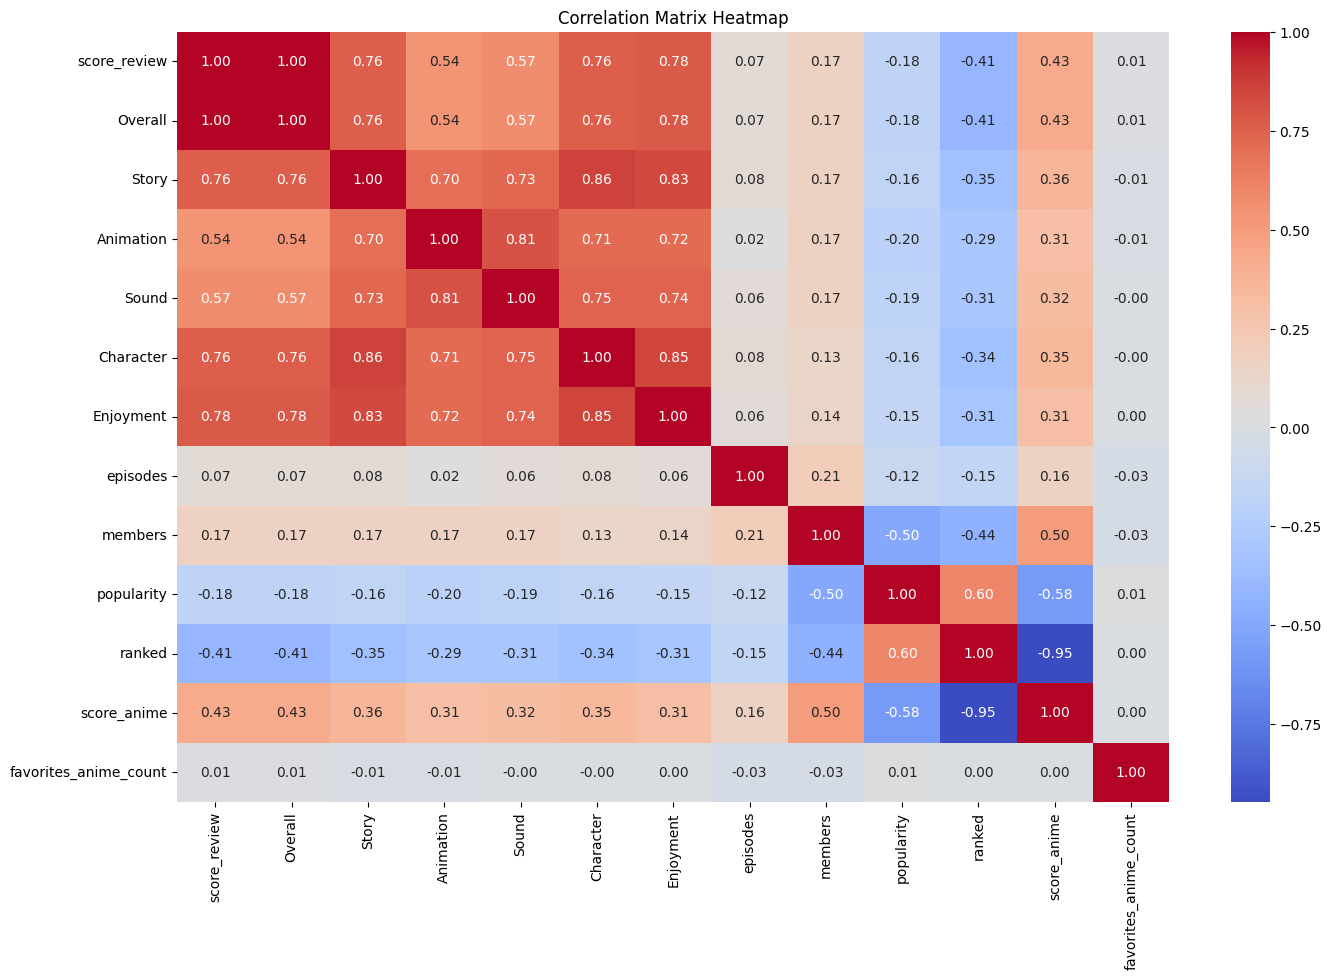

In [103]:
numeric_df = full_df.select_dtypes(include=['float64', 'int64', 'int32']).drop(columns=['uid_review', 'anime_uid', 'uid_anime'])

plt.figure(figsize=(16, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


<Figure size 1600x800 with 0 Axes>

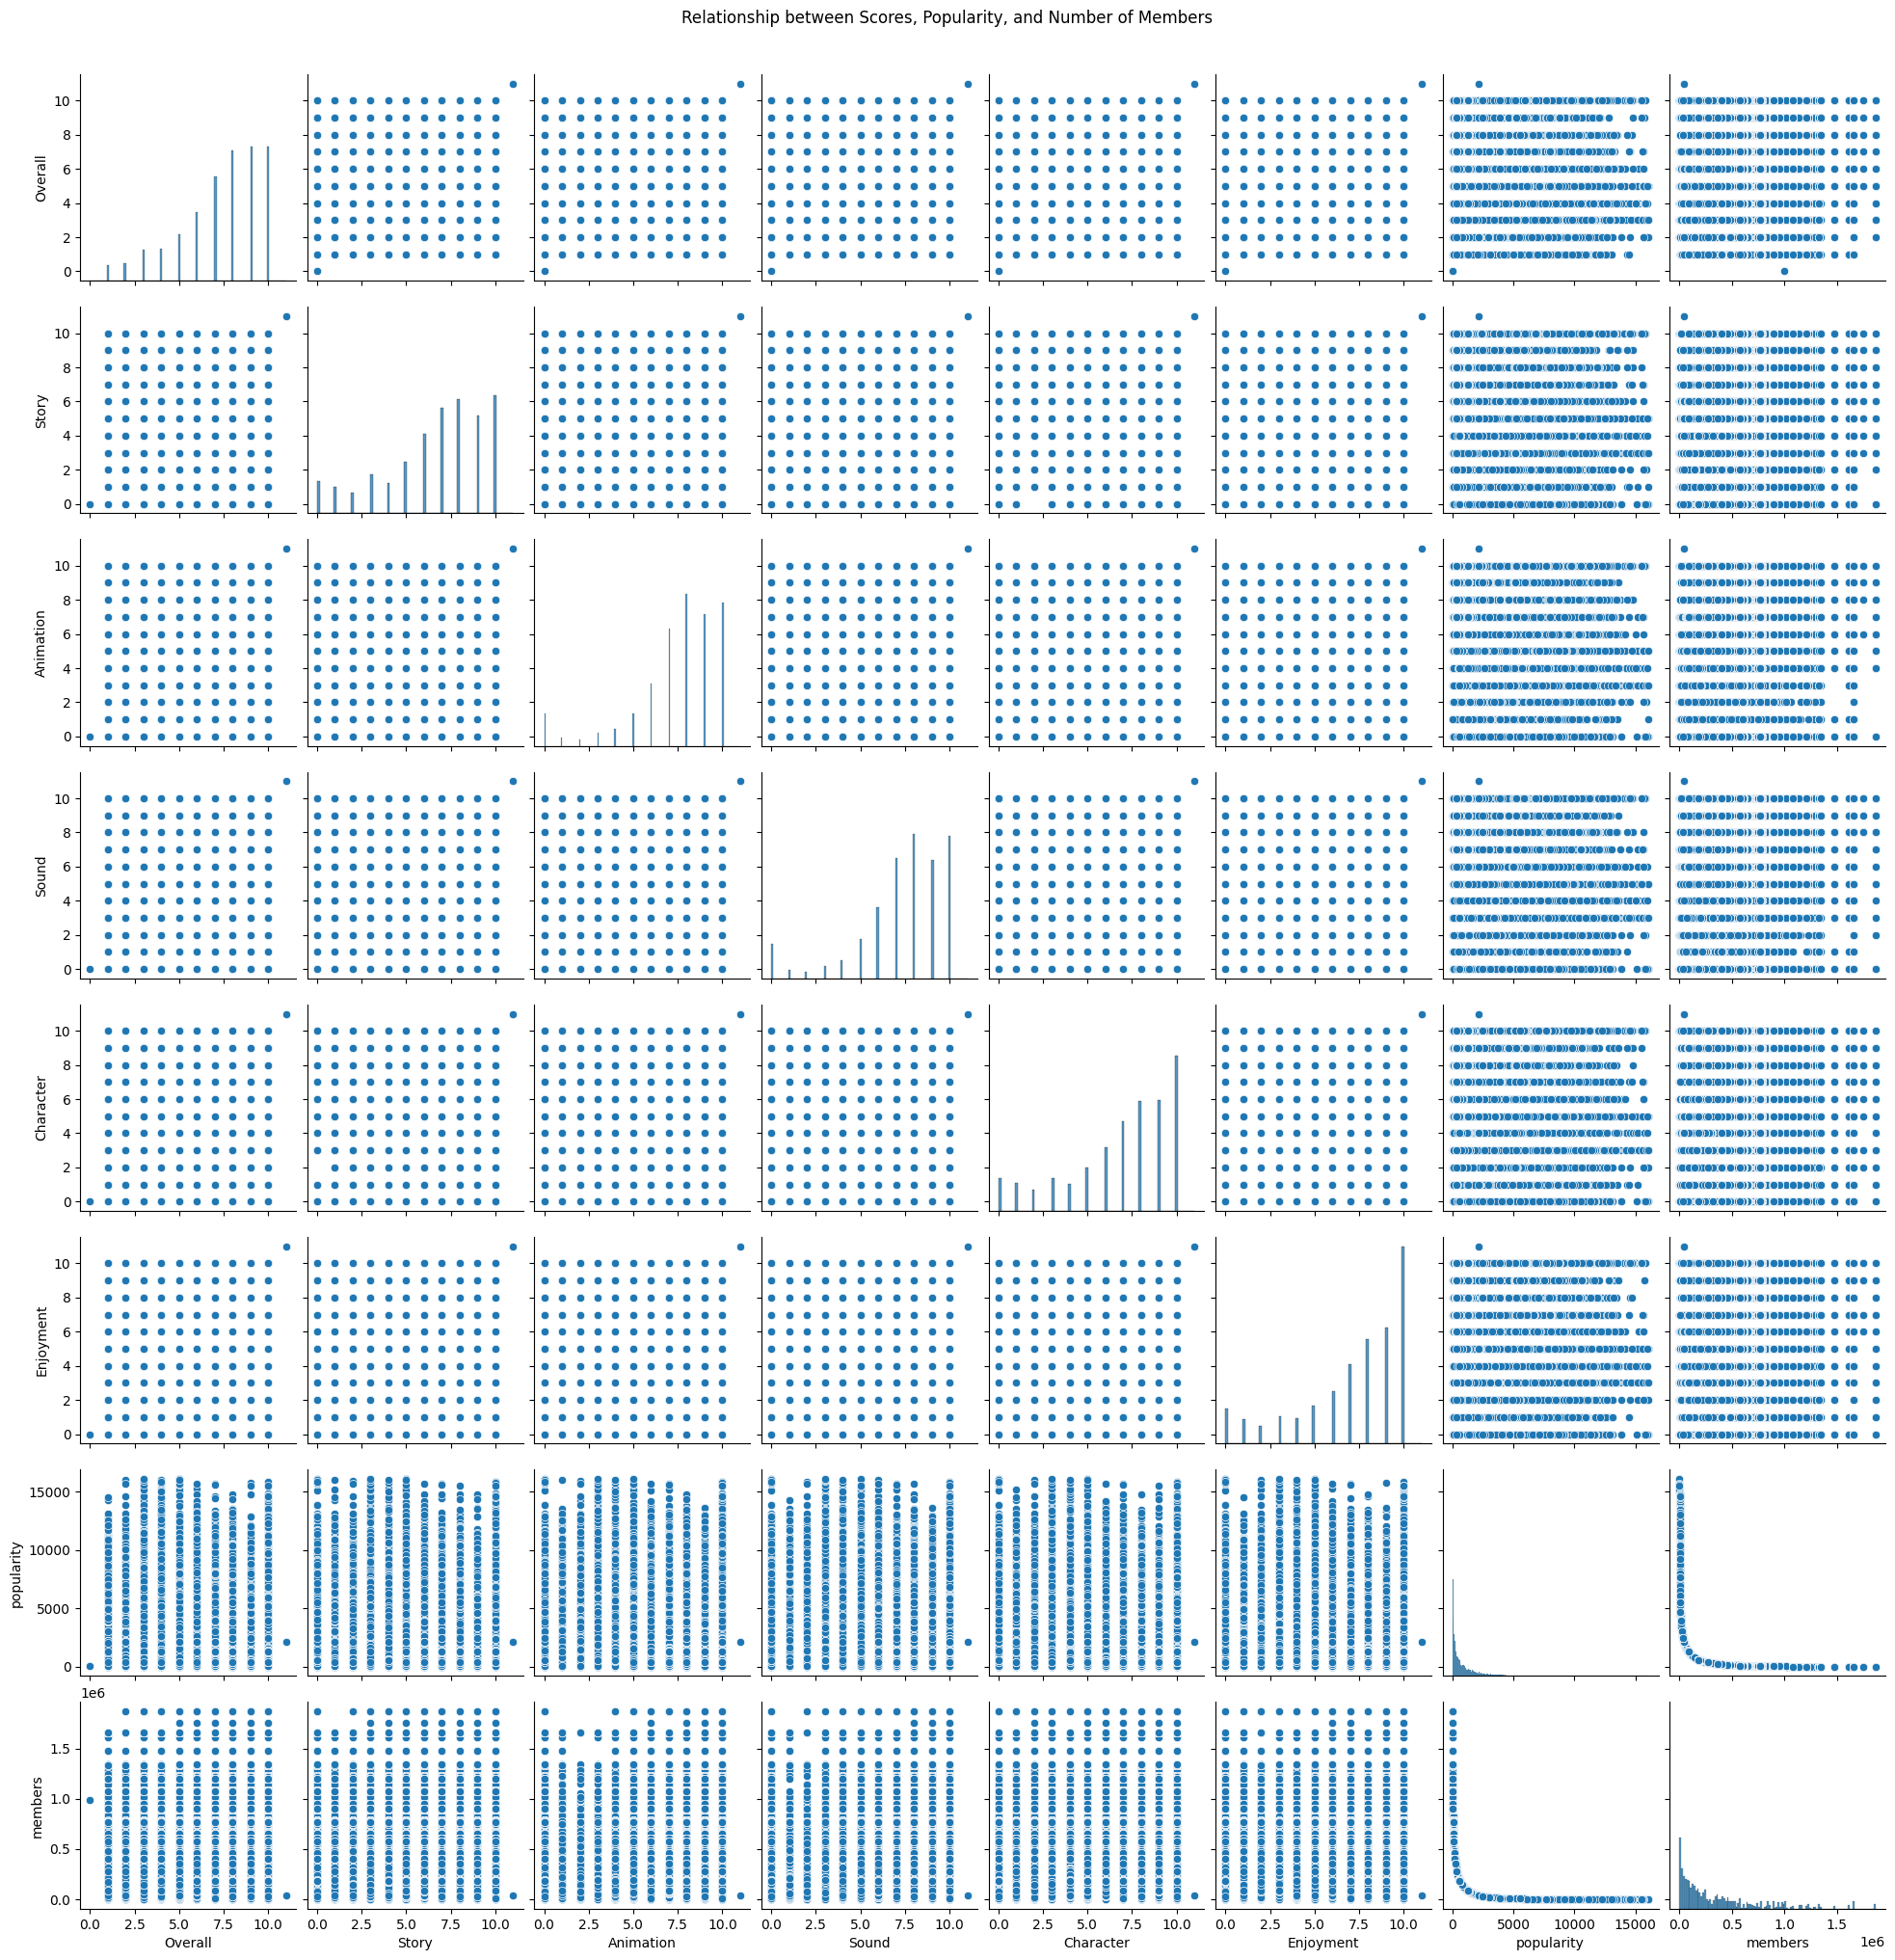

In [105]:
columns_of_interest = ['Overall', 'Story', 'Animation', 'Sound', 'Character', 'Enjoyment', 'popularity', 'members']
selected_df = numeric_df[columns_of_interest]

plt.figure(figsize=(16, 8))
sns.pairplot(selected_df)
plt.suptitle('Relationship between Scores, Popularity, and Number of Members', y=1.02)
plt.show()